In [1]:
from tensorflow import keras
import numpy as np 
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# !nvidia-smi

In [3]:
# mnist = "C:/Users/PC/Documents/R_4DS/digits-classifier/mnist"

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

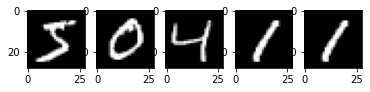

In [5]:
plt.subplot(151)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(152)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(153)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(154)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.subplot(155)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

plt.show()

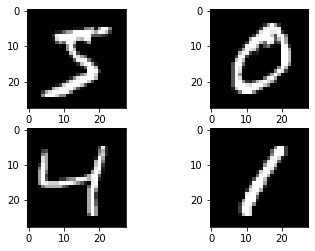

In [6]:
# Plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

plt.show()

In [7]:
train_dta_shape = X_train.shape

print("{} images, with {} by {} dimensions".format(train_dta_shape[0], train_dta_shape[1], train_dta_shape[2]))

60000 images, with 28 by 28 dimensions


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import np_utils

In [9]:
# Flatten 
# num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

## Normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

## One Hot encode outputs - Y/n
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [10]:
## Building [Sequntial] Models
model = Sequential()

model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(50, activation = "relu"))
model.add(Dense(num_classes, activation="softmax"))

In [11]:
## Compiiling, Fitting and Evaluation
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=2)

scores = model.evaluate(X_test, y_test, verbose = 0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/30
300/300 - 10s - loss: 0.3981 - accuracy: 0.8751 - val_loss: 0.0789 - val_accuracy: 0.9762
Epoch 2/30
300/300 - 4s - loss: 0.0974 - accuracy: 0.9699 - val_loss: 0.0480 - val_accuracy: 0.9849
Epoch 3/30
300/300 - 4s - loss: 0.0715 - accuracy: 0.9778 - val_loss: 0.0547 - val_accuracy: 0.9811
Epoch 4/30
300/300 - 4s - loss: 0.0593 - accuracy: 0.9818 - val_loss: 0.0337 - val_accuracy: 0.9896
Epoch 5/30
300/300 - 4s - loss: 0.0491 - accuracy: 0.9846 - val_loss: 0.0301 - val_accuracy: 0.9895
Epoch 6/30
300/300 - 4s - loss: 0.0441 - accuracy: 0.9861 - val_loss: 0.0342 - val_accuracy: 0.9895
Epoch 7/30
300/300 - 4s - loss: 0.0378 - accuracy: 0.9882 - val_loss: 0.0273 - val_accuracy: 0.9903
Epoch 8/30
300/300 - 4s - loss: 0.0361 - accuracy: 0.9888 - val_loss: 0.0253 - val_accuracy: 0.9926
Epoch 9/30
300/300 - 4s - loss: 0.0322 - accuracy: 0.9897 - val_loss: 0.0284 - val_accuracy: 0.9909
Epoch 10/30
300/300 - 5s - loss: 0.0295 - accuracy: 0.9906 - val_loss: 0.0295 - val_accuracy: 0.990

Very Good!

In [12]:
# Save model for download
model.save("digit-recognizer-model.h5")

In [21]:
import tensorflowjs

!tensorflowjs_converter --input_format keras 'C:/Users/PC/PycharmProjects/Production_Work_w_st/Digit-Recognizer/digit-recognizer-model.h5' 'C:/Users/PC/PycharmProjects/Production_Work_w_st/Digit-Recognizer/model/converted_models'

2021-07-21 18:17:16.659923: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
Traceback (most recent call last):
  File "c:\users\pc\anaconda3\envs\tf-gpu2.5\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\users\pc\anaconda3\envs\tf-gpu2.5\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\PC\Anaconda3\envs\tf-gpu2.5\Scripts\tensorflowjs_converter.exe\__main__.py", line 7, in <module>
  File "c:\users\pc\anaconda3\envs\tf-gpu2.5\lib\site-packages\tensorflowjs\converters\converter.py", line 813, in pip_main
    main([' '.join(sys.argv[1:])])
  File "c:\users\pc\anaconda3\envs\tf-gpu2.5\lib\site-packages\tensorflowjs\converters\converter.py", line 817, in main
    convert(argv[0].split(' '))
  File "c:\users\pc\anaconda3\envs\tf-gpu2.5\lib\site-packages\tensorflowjs\converters\converter.py", line 803, in convert
    _dispatch_converte

In [24]:
!tensorflowjs_converter --input_format keras digit-recognizer-model.h5 /model

2021-07-21 18:25:27.426751: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
Traceback (most recent call last):
  File "c:\users\pc\anaconda3\envs\tf-gpu2.5\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\users\pc\anaconda3\envs\tf-gpu2.5\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\PC\Anaconda3\envs\tf-gpu2.5\Scripts\tensorflowjs_converter.exe\__main__.py", line 7, in <module>
  File "c:\users\pc\anaconda3\envs\tf-gpu2.5\lib\site-packages\tensorflowjs\converters\converter.py", line 813, in pip_main
    main([' '.join(sys.argv[1:])])
  File "c:\users\pc\anaconda3\envs\tf-gpu2.5\lib\site-packages\tensorflowjs\converters\converter.py", line 817, in main
    convert(argv[0].split(' '))
  File "c:\users\pc\anaconda3\envs\tf-gpu2.5\lib\site-packages\tensorflowjs\converters\converter.py", line 803, in convert
    _dispatch_converte